In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
train=pd.read_csv("train_Insurance.csv")


# Visualisation

In [2]:
train.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [3]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,4935.000000
mean,2013.660215,0.869713,0.301077,1876.898683
std,1.383134,0.219496,0.458772,2267.277397
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,520.000000
50%,2013.000000,1.000000,0.000000,1067.000000
75%,2015.000000,1.000000,1.000000,2280.000000
max,2016.000000,1.000000,1.000000,20840.000000


# Traitements les values nulles

In [4]:
train.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

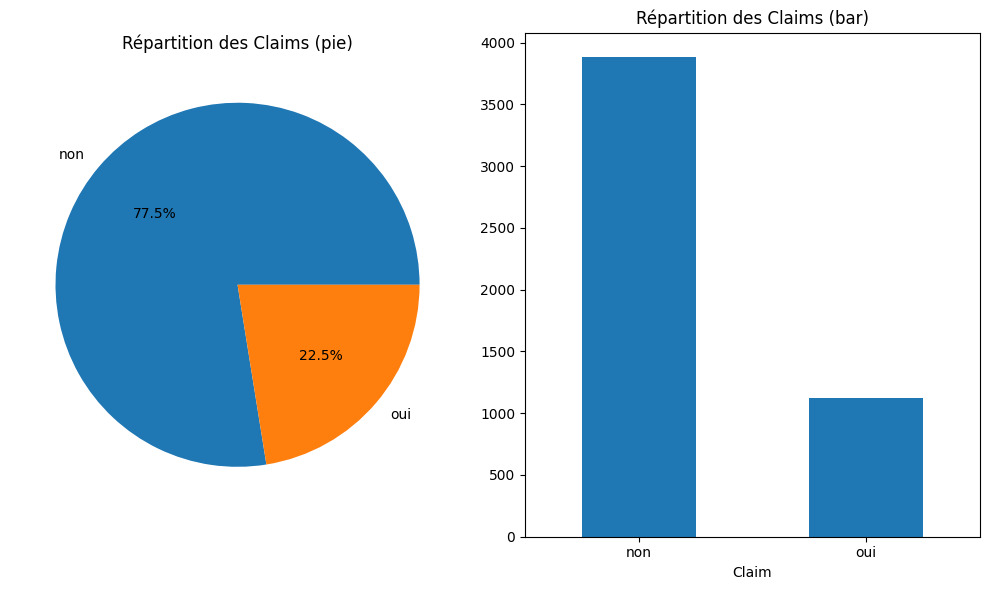

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
train['Claim'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    ylabel='',             
    title='Répartition des Claims (pie)'
)


train['Claim'].value_counts().plot.bar(
    ax=axes[1],
    rot=0,
    title='Répartition des Claims (bar)'
)

plt.tight_layout()
plt.show()

# Visualisation Attributs Nominale

Colonnes catégorielles utiles : ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows', 'Geo_Code']


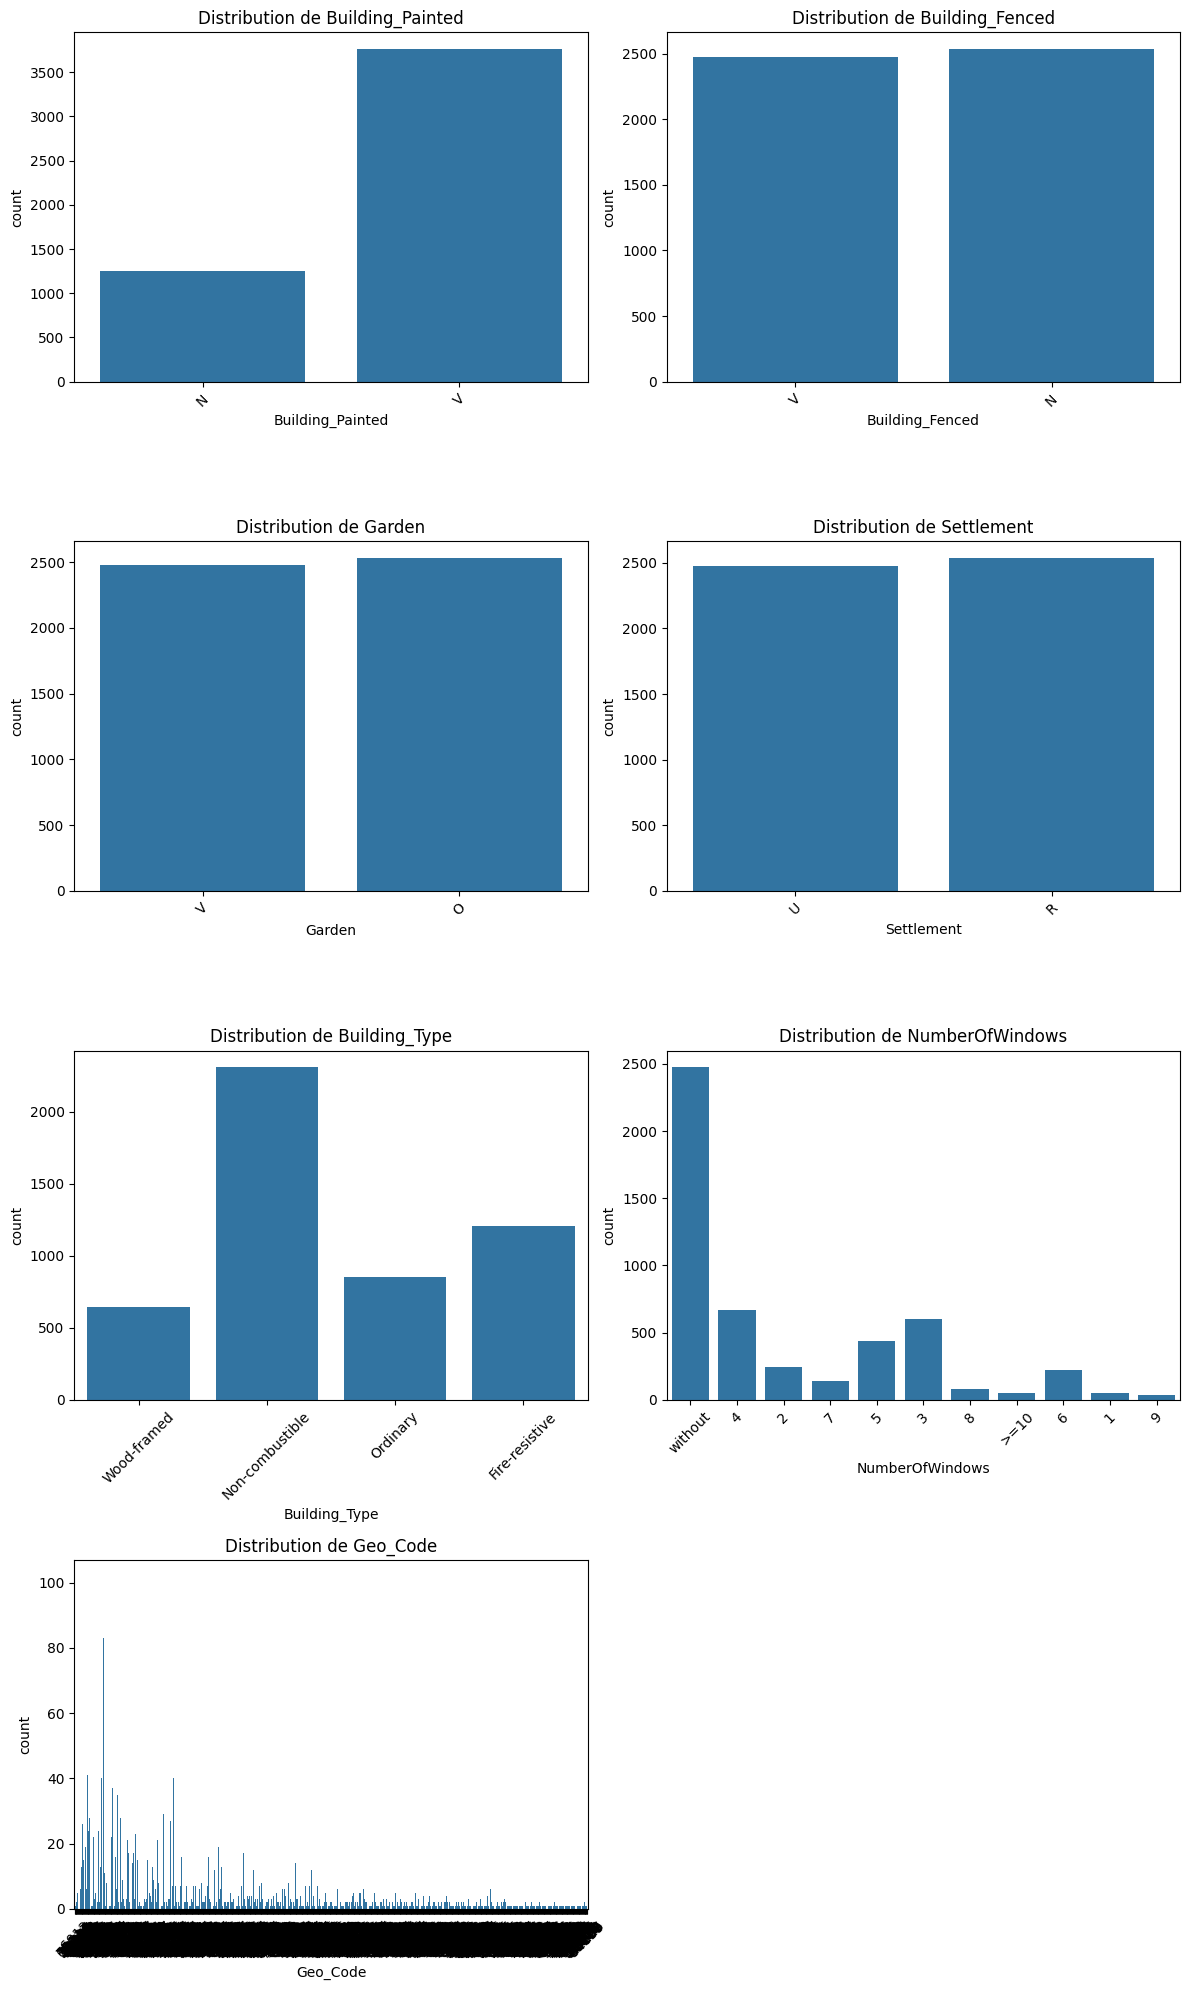

In [6]:
cat_cols = [col for col in train.select_dtypes(include=["object", "category"]).columns
            if col not in ["Claim", "Customer Id"]]

print("Colonnes catégorielles utiles :", cat_cols)

# Définir la grille (2 colonnes par ligne)
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

axes = axes.flatten()  # simplifier l'accès aux axes

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=train, ax=axes[i])
    axes[i].set_title(f"Distribution de {col}")
    axes[i].tick_params(axis='x', rotation=45)  # rotation pour lisibilité

# Supprimer les axes vides si le nb de colonnes n’est pas multiple de n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# visualisation donne numeriques Discrets

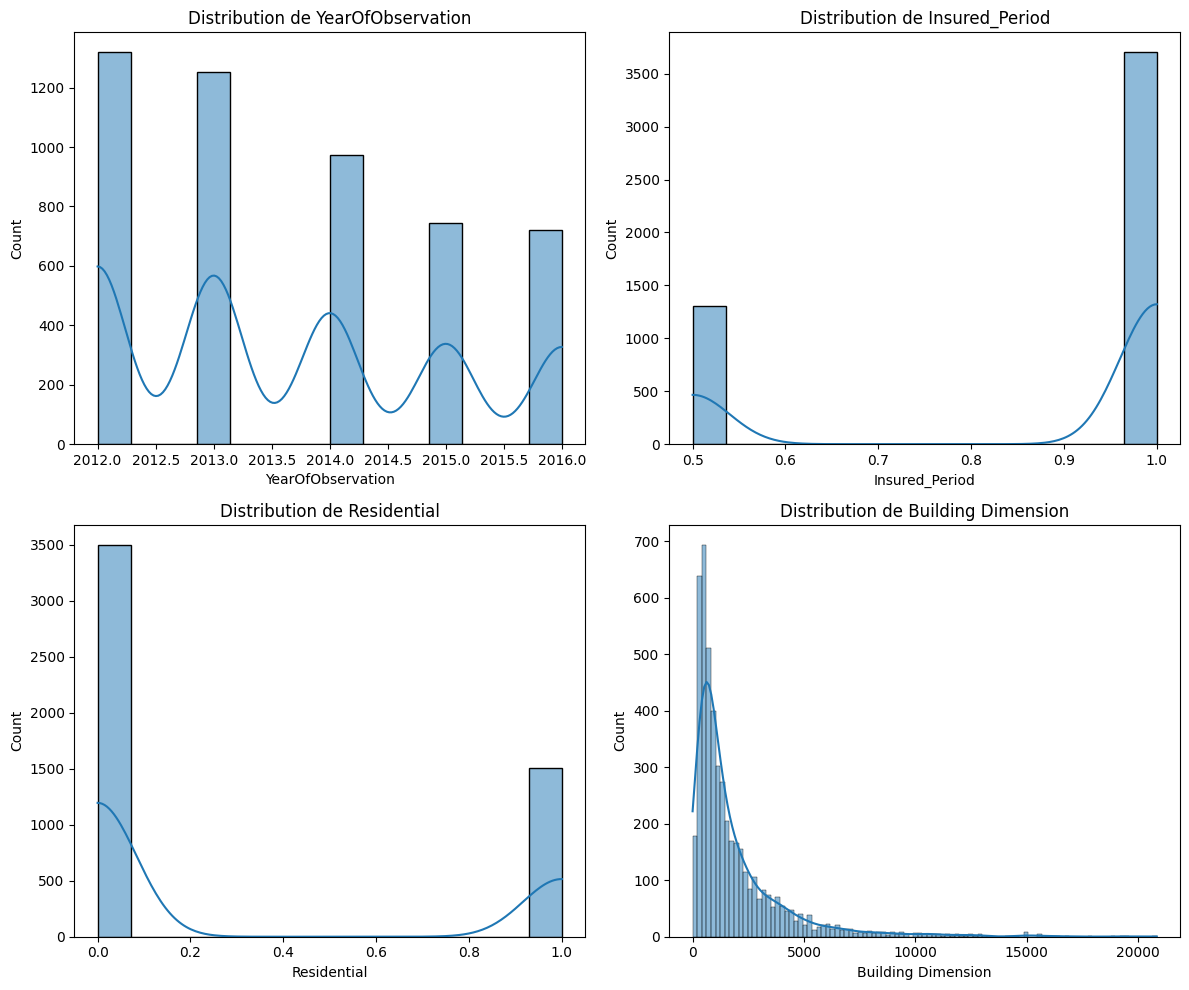

In [7]:


# Colonnes numériques automatiquement détectées
num_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["Claim", "Customer Id"]]  # exclure cible et id

# Définir la grille (2 colonnes par ligne)
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)

# Supprimer les cases vides si besoin
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [8]:
train.isna().sum() # no null values

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

# Transformation De Donnees

## Duplicates 

<div style="border:2px solid #d9534f; padding:12px; border-radius:6px; background:#f9e6e6;">
<strong style="color:#d9534f;">ATTENTION : — Major data quality issue detected ⚠️</strong>
</div>

In [9]:
train.drop(labels=['Customer Id'], axis=1, inplace=True)
list(train)

['YearOfObservation',
 'Insured_Period',
 'Residential',
 'Building_Painted',
 'Building_Fenced',
 'Garden',
 'Settlement',
 'Building Dimension',
 'Building_Type',
 'NumberOfWindows',
 'Geo_Code',
 'Claim']

#### Years of Onservation

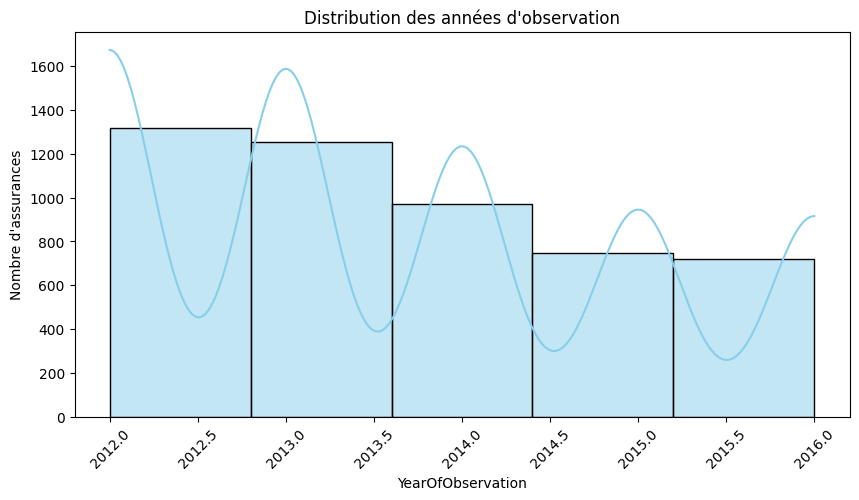

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(train["YearOfObservation"], bins=train["YearOfObservation"].nunique(), color="skyblue", kde=True)
plt.title("Distribution des années d'observation")
plt.xlabel("YearOfObservation")
plt.ylabel("Nombre d'assurances")
plt.xticks(rotation=45)
plt.show()


#### Insured_Period

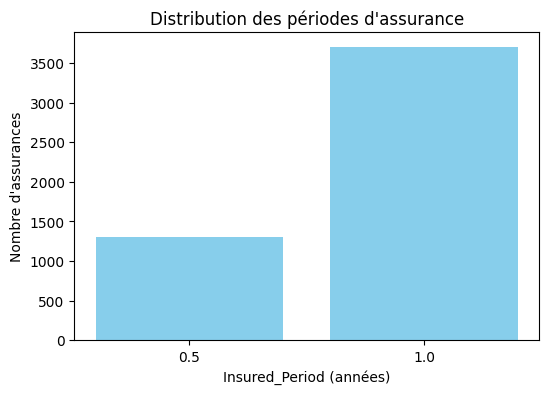

In [11]:
import matplotlib.pyplot as plt

period_counts = train["Insured_Period"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(period_counts.index.astype(str), period_counts.values, color="skyblue")
plt.title("Distribution des périodes d'assurance")
plt.xlabel("Insured_Period (années)")
plt.ylabel("Nombre d'assurances")
plt.show()
# Data Imbalance Detected

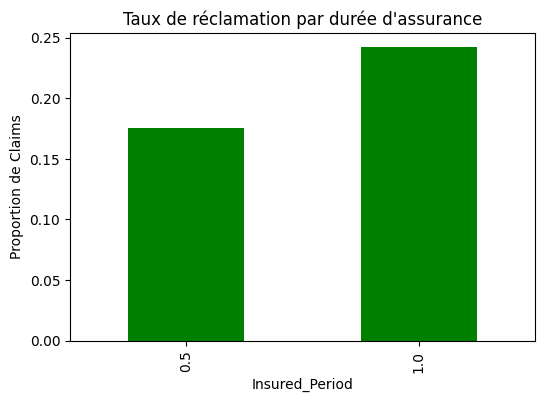

In [12]:
claim_rate = train.groupby("Insured_Period")["Claim"].apply(lambda x: (x=="oui").mean())

plt.figure(figsize=(6,4))
claim_rate.plot(kind="bar", color="green")
plt.title("Taux de réclamation par durée d'assurance")
plt.ylabel("Proportion de Claims")
plt.xlabel("Insured_Period")
plt.show()
# no need the alter the data as the proportions are close

#### Residential 

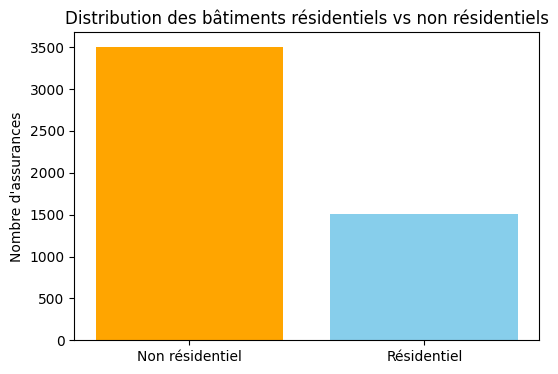

In [13]:
import matplotlib.pyplot as plt

counts = train["Residential"].value_counts()
labels = ["Non résidentiel", "Résidentiel"]

plt.figure(figsize=(6,4))
plt.bar(labels, counts.values, color=["orange","skyblue"])
plt.title("Distribution des bâtiments résidentiels vs non résidentiels")
plt.ylabel("Nombre d'assurances")
plt.show()
# data imbalance

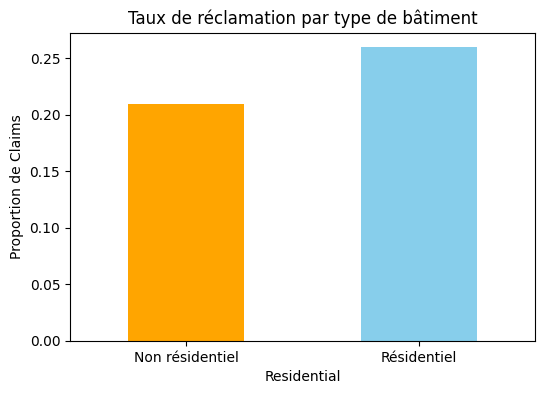

In [14]:
claim_rate = train.groupby("Residential")["Claim"].apply(lambda x: (x=="oui").mean())

plt.figure(figsize=(6,4))
claim_rate.plot(kind="bar", color=["orange","skyblue"])
plt.title("Taux de réclamation par type de bâtiment")
plt.ylabel("Proportion de Claims")
plt.xticks([0,1], ["Non résidentiel", "Résidentiel"], rotation=0)
plt.show()


#### Building_Painted 

In [15]:
train["Building_Painted"].value_counts()

Building_Painted
V    3763
N    1249
Name: count, dtype: int64

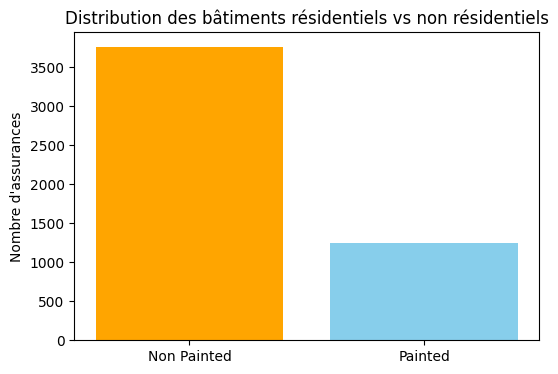

In [16]:
import matplotlib.pyplot as plt

counts = train["Building_Painted"].value_counts()
labels = ["Non Painted", "Painted"]

plt.figure(figsize=(6,4))
plt.bar(labels, counts.values, color=["orange","skyblue"])
plt.title("Distribution des bâtiments résidentiels vs non résidentiels")
plt.ylabel("Nombre d'assurances")
plt.show()
# data imbalance

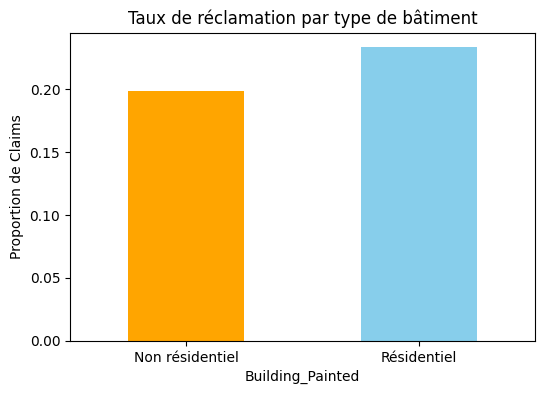

In [17]:
claim_rate = train.groupby("Building_Painted")["Claim"].apply(lambda x: (x=="oui").mean())

plt.figure(figsize=(6,4))
claim_rate.plot(kind="bar", color=["orange","skyblue"])
plt.title("Taux de réclamation par type de bâtiment")
plt.ylabel("Proportion de Claims")
plt.xticks([0,1], ["Non résidentiel", "Résidentiel"], rotation=0)
plt.show()


#### Building_Fenced

In [18]:
train["Building_Fenced"].value_counts() # no need for further manipulation

Building_Fenced
N    2535
V    2477
Name: count, dtype: int64

#### Garden

In [19]:
train["Garden"].isna().sum() # 4 NaN values 

np.int64(4)

In [20]:
mf_imputer = SimpleImputer(missing_values=np.nan, 
strategy="most_frequent")
train[["Garden"]]=mf_imputer.fit_transform(train.loc[:,['Garden']]) 

#### Settlement

In [21]:
print(train["Settlement"].value_counts())
print("valeurs manquantes :",train["Settlement"].isna().sum()) # no NaN values


Settlement
R    2537
U    2475
Name: count, dtype: int64
valeurs manquantes : 0


#### Building Dimension

In [22]:
median_imputer = SimpleImputer(strategy="median")
train[["Building Dimension"]] = median_imputer.fit_transform(train[["Building Dimension"]])

####  Geo_Code

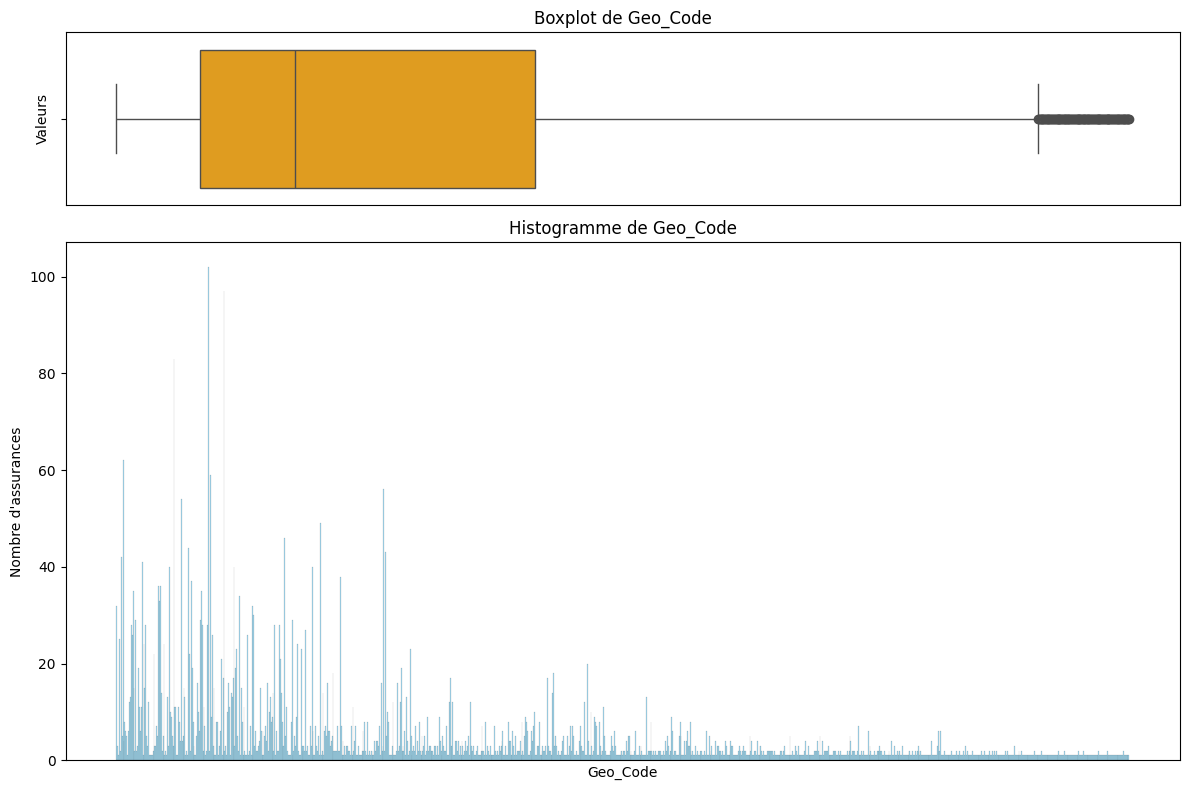

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 3]})

# Boxplot sur le premier axe
sns.boxplot(x=train["Geo_Code"], ax=axes[0], color="orange")
axes[0].set_title("Boxplot de Geo_Code")
axes[0].set_xlabel("")
axes[0].set_ylabel("Valeurs")
axes[0].set_xticks([])  # supprimer les valeurs de l'axe x

# Histogramme sur le deuxième axe
sns.histplot(train["Geo_Code"], bins=30, color="skyblue", ax=axes[1])
axes[1].set_title("Histogramme de Geo_Code")
axes[1].set_xlabel("Geo_Code")
axes[1].set_ylabel("Nombre d'assurances")
axes[1].set_xticks([])  # supprimer les valeurs de l'axe x

plt.tight_layout()
plt.show()


In [24]:
# Calculer la valeur la plus fréquente (mode) de Geo_Code par Settlement + Residential
mode_geo = (
    train[train["Geo_Code"].notna()]
    .groupby(["Settlement", "Residential"])["Geo_Code"]
    .agg(lambda x: x.mode()[0])   # prend le mode (la valeur la plus fréquente)
    .reset_index()
    .rename(columns={"Geo_Code": "Geo_Code_mode"})
)

# Fusionner avec le dataframe original pour récupérer la valeur à imputer
train = train.merge(mode_geo, on=["Settlement", "Residential"], how="left")

# Remplacer les NaN par la valeur la plus fréquente du groupe
train["Geo_Code"] = train["Geo_Code"].fillna(train["Geo_Code_mode"])

# Supprimer la colonne temporaire
train = train.drop(columns=["Geo_Code_mode"])


In [25]:
train["Geo_Code"].value_counts()

Geo_Code
33063    121
6088     102
21231     98
6083      83
31555     62
        ... 
57209      1
31395      1
44009      1
83933      1
42285      1
Name: count, Length: 1115, dtype: int64

In [26]:
mask_numeric_only = train["Geo_Code"].str.isnumeric()
mask_alpha = train["Geo_Code"].str.contains(r'[A-Za-z]')
# Sélectionner ces lignes
geo_numeric_only = train[mask_numeric_only]
geo_rest_only = train[mask_alpha]
print("nbre de valeur numerique",geo_numeric_only["Geo_Code"].value_counts().sum())
print("nbre de valeur alphanumertique",geo_rest_only["Geo_Code"].value_counts().sum())
train = train[mask_numeric_only].copy()  # suppresion des lignes conitanant des valeurs alpha numeriques dans l'attribut Geo_Code
train["Geo_Code"] = train["Geo_Code"].astype(int)


nbre de valeur numerique 4974
nbre de valeur alphanumertique 38


In [27]:
train["Geo_Code"].value_counts()
# only 8 Geo codes and the rest is collapsed in Other

Geo_Code
33063    121
6088     102
21231     98
6083      83
31555     62
        ... 
57209      1
31395      1
44009      1
83933      1
42285      1
Name: count, Length: 1108, dtype: int64

#### Building_Type

In [28]:
train["Building_Type"].value_counts() # no modifcations needed 

Building_Type
Non-combustible    2310
Fire-resistive     1205
Ordinary            816
Wood-framed         643
Name: count, dtype: int64

In [29]:
train["Building_Type"].isna().sum()

np.int64(0)

In [30]:
train.isna().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

#### NumberOfWindows a revisiter

In [31]:
train["NumberOfWindows"].value_counts()

NumberOfWindows
without    2471
4           665
3           596
5           429
2           239
6           222
7           135
8            84
>=10         52
1            47
9            34
Name: count, dtype: int64

In [32]:
import pandas as pd

# Nettoyage initial de NumberOfWindows
train['NumberOfWindows'] = train['NumberOfWindows'].replace({'without': 0, '>=10': 10})
train['NumberOfWindows'] = train['NumberOfWindows'].astype(int)

bins = [-1, 0, 3, 6, 100]
labels = ['0', '1-3', '4-6', '7+']
# train['Windows_Bin'] = pd.cut(train['NumberOfWindows'], bins=bins, labels=labels)

# --- Détection des doublons ---
n_exact = train.duplicated().sum()
n_same_features = train.duplicated(subset=[c for c in train.columns if c != 'Claim']).sum()

if n_exact == 0 and n_same_features == 0:
    print(" Aucun doublon détecté.")
else:
    print("  Doublons détectés :")
    print(f"  - Doublons exacts (toutes colonnes identiques) : {n_exact}")
    print(f"  - Doublons mêmes features (sauf 'Claim') : {n_same_features}")
    
    # Détection des conflits : mêmes features mais Claim différent
    if n_same_features > 0:
        features = [c for c in train.columns if c != "Claim"]

        # Identifier les lignes avec features identiques
        dups = train[train.duplicated(subset=features, keep=False)]

        # Identifier les groupes ayant plusieurs valeurs de Claim
        conflicts = dups.groupby(features)['Claim'].nunique()
        n_conflicts = (conflicts > 1).sum()
        print("Nombre de conflits :", n_conflicts)

        # --- Suppression des lignes conflictuelles ---
        if n_conflicts > 0:
            # Groupes de features en conflit
            conflicting_groups = conflicts[conflicts > 1].reset_index()

            # Fusion pour marquer les lignes conflictuelles
            train = train.merge(conflicting_groups[features], on=features, how='left', indicator=True)

            # Garder uniquement les lignes non conflictuelles
            before = len(train)
            train = train[train['_merge'] == 'left_only'].drop(columns=['_merge'])
            after = len(train)

            print(f"{before - after} lignes conflictuelles supprimées.")
        else:
            print(" Aucun conflit détecté, rien à supprimer.")

        dups = train[train.duplicated(subset=features, keep=False)]

        # Identifier les groupes ayant plusieurs valeurs de Claim
        conflicts = dups.groupby(features)['Claim'].nunique()
        n_conflicts = (conflicts > 1).sum()
        print("Nombre de conflits :", n_conflicts)


# Suppression des doublons restants exacts
train.drop_duplicates(inplace=True)


  Doublons détectés :
  - Doublons exacts (toutes colonnes identiques) : 42
  - Doublons mêmes features (sauf 'Claim') : 55
Nombre de conflits : 13
46 lignes conflictuelles supprimées.
Nombre de conflits : 0


## outliers

Colonnes numériques : ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'NumberOfWindows', 'Geo_Code']


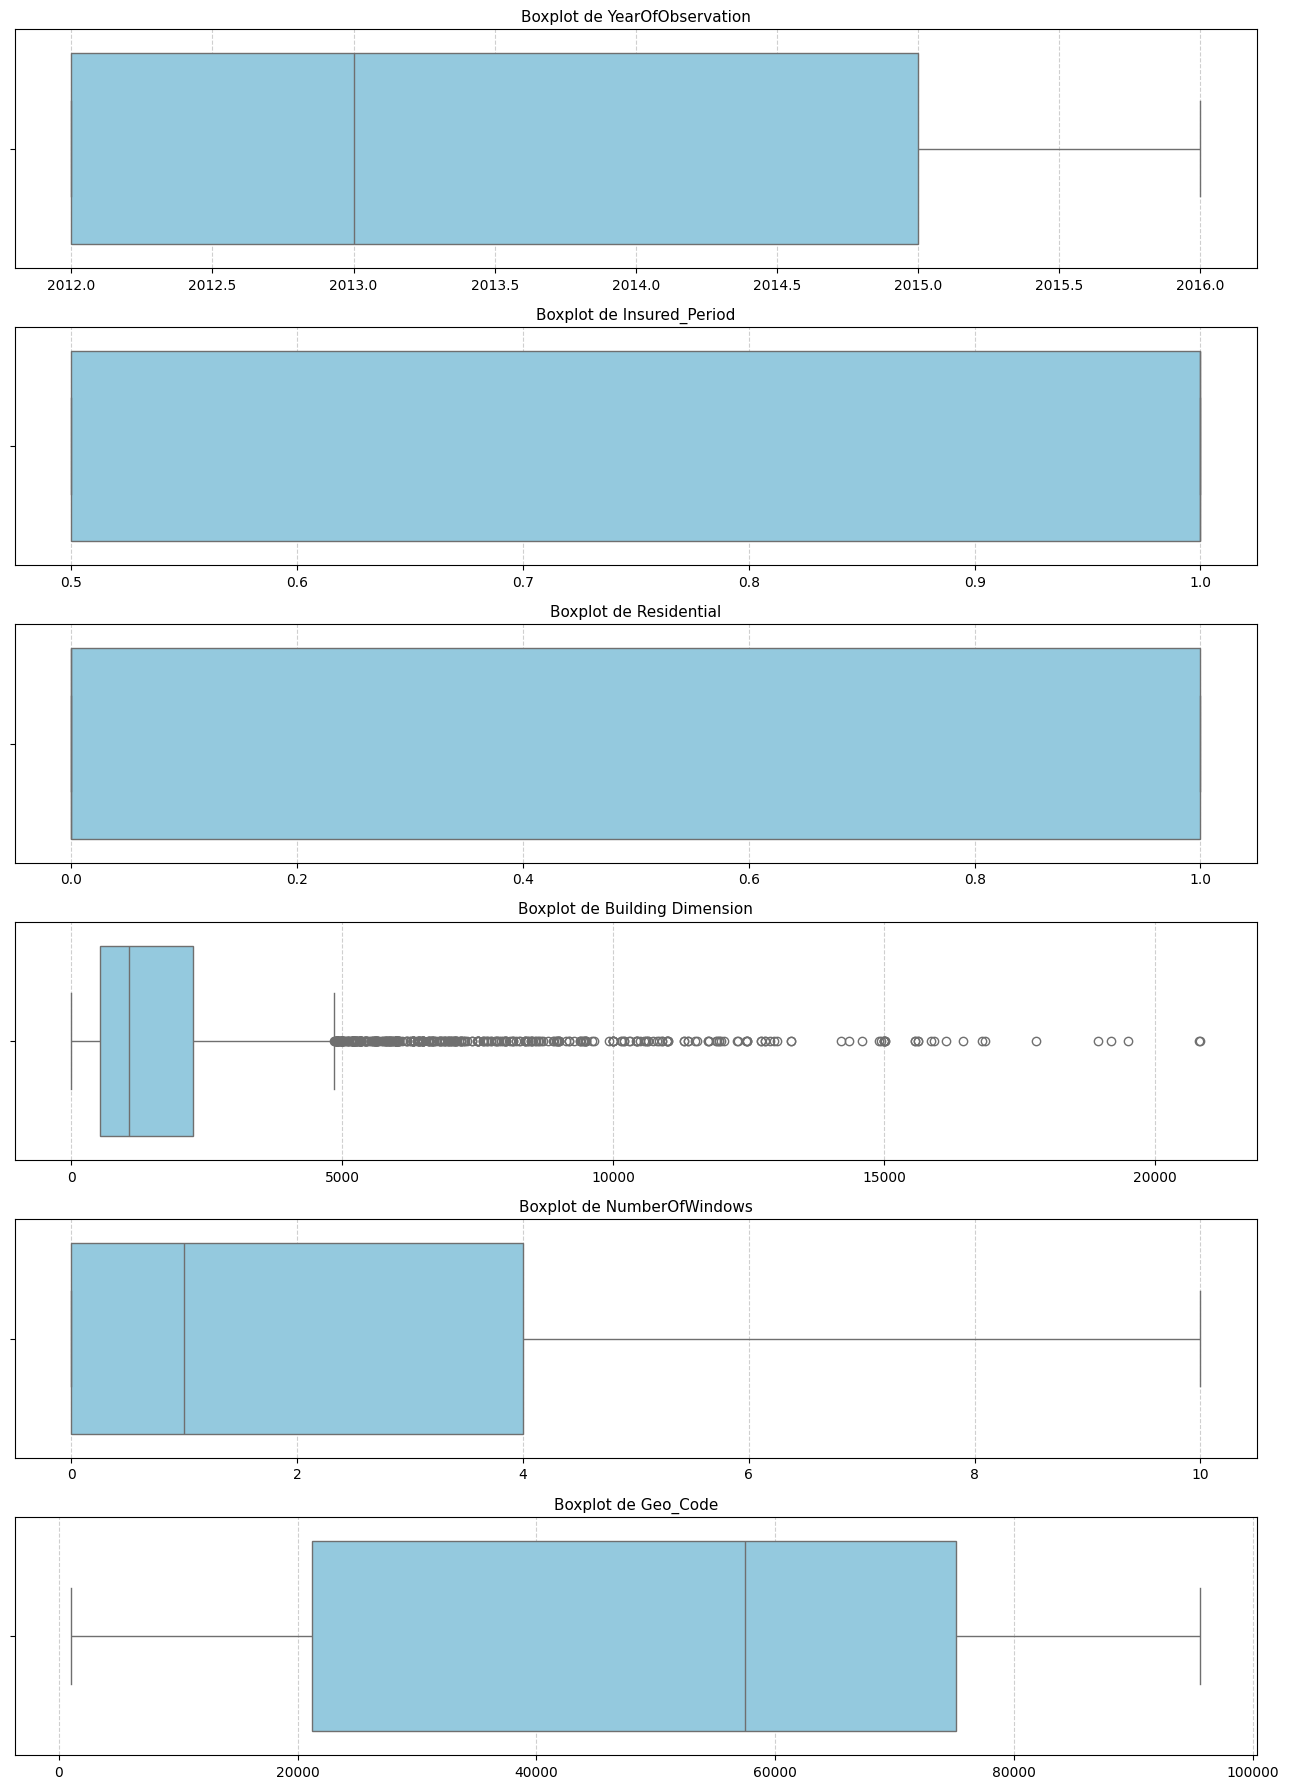

In [33]:
num_cols = train.select_dtypes(include=['int64', 'float64',"int"]).columns
print("Colonnes numériques :", list(num_cols))


fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(13, 3 * len(num_cols)))

# Si une seule colonne, axes n’est pas une liste
if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):
    sns.boxplot(x=col, data=train, color='skyblue', ax=ax)
    ax.set_title(f'Boxplot de {col}', fontsize=11)
    ax.set_xlabel('')
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Colonnes numériques : ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'NumberOfWindows', 'Geo_Code']


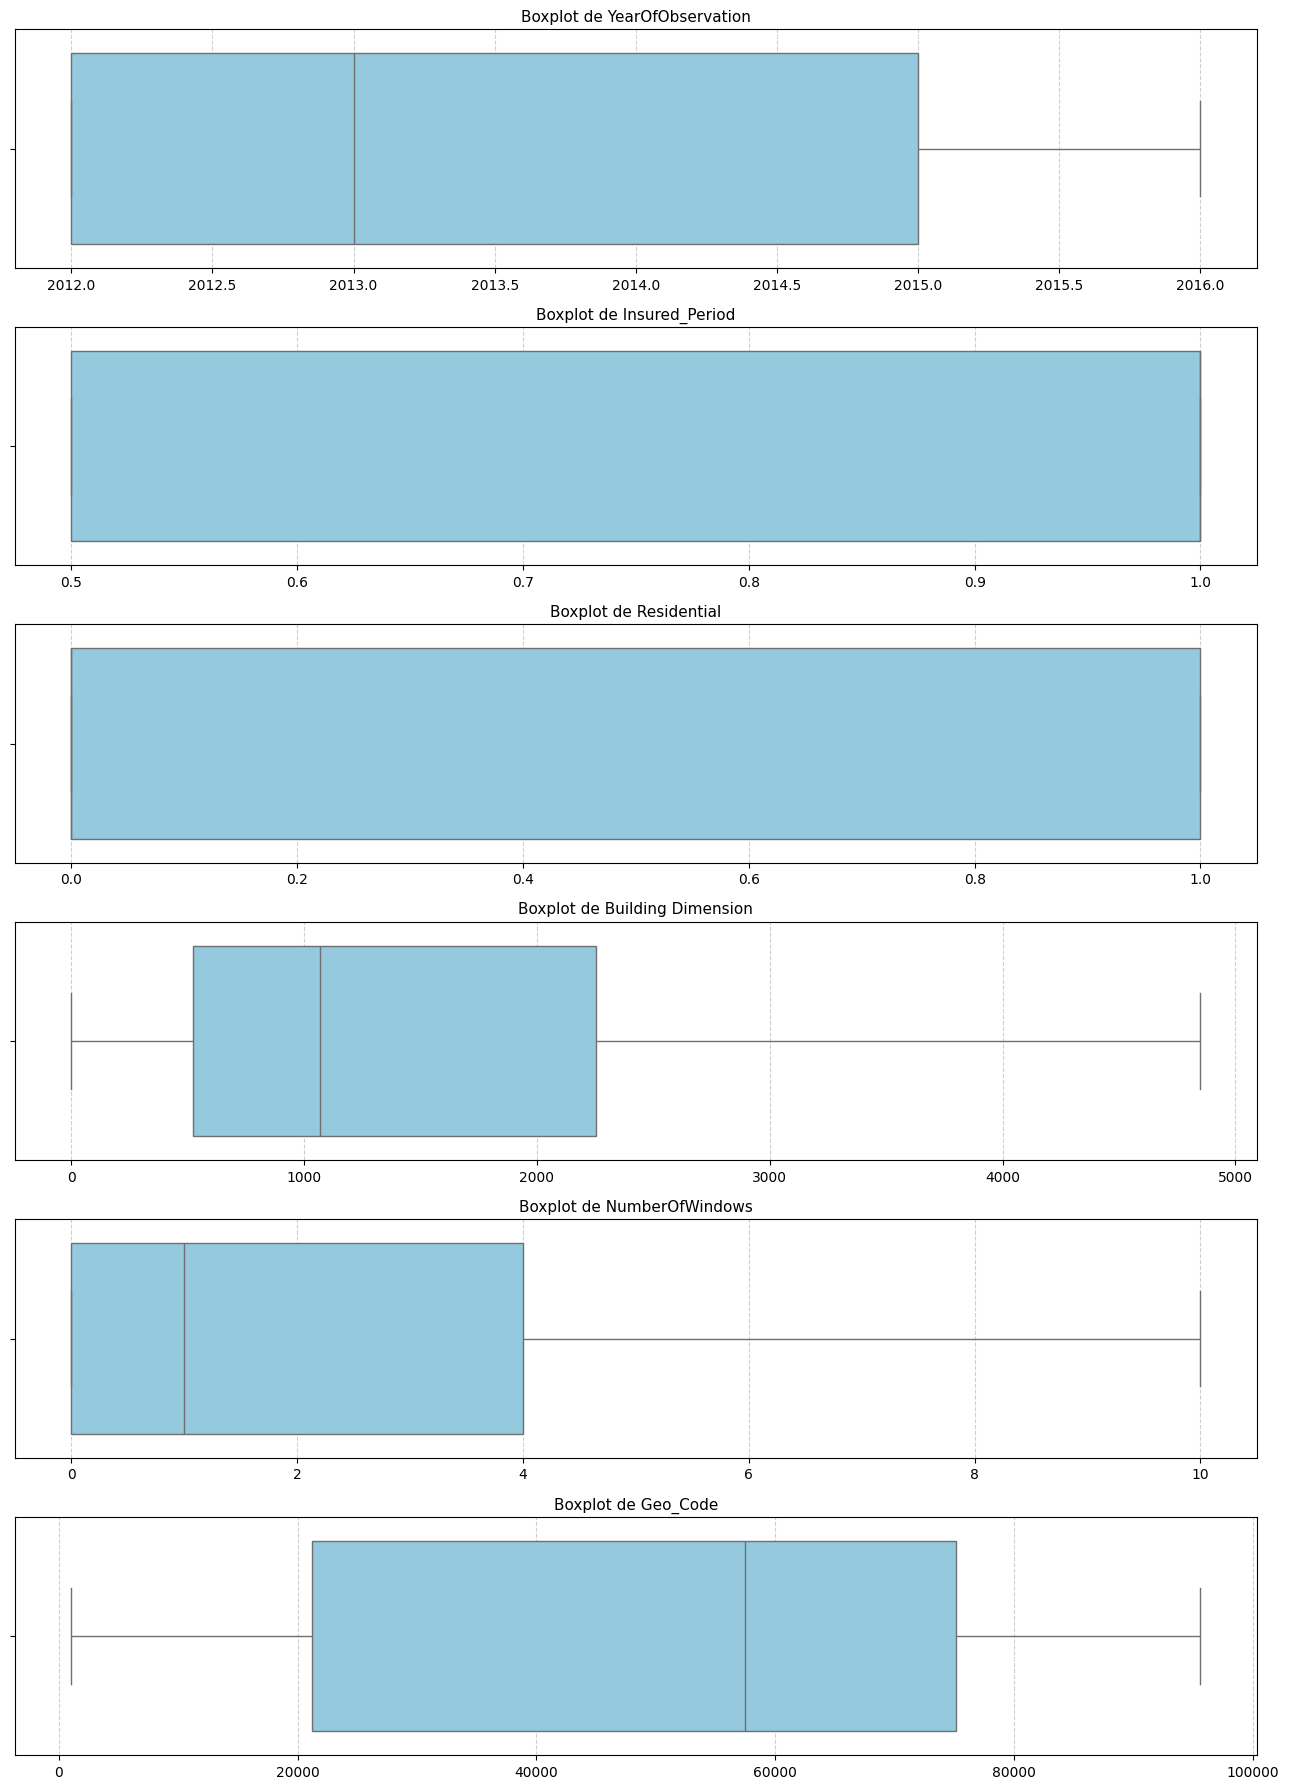

In [34]:
Q1 = train['Building Dimension'].quantile(0.25)
Q3 = train['Building Dimension'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

train['Building Dimension'] = train['Building Dimension'].clip(lower, upper)

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
print("Colonnes numériques :", list(num_cols))


fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(13, 3 * len(num_cols)))

# Si une seule colonne, axes n’est pas une liste
if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):
    sns.boxplot(x=col, data=train, color='skyblue', ax=ax)
    ax.set_title(f'Boxplot de {col}', fontsize=11)
    ax.set_xlabel('')
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## tronsformation de donner


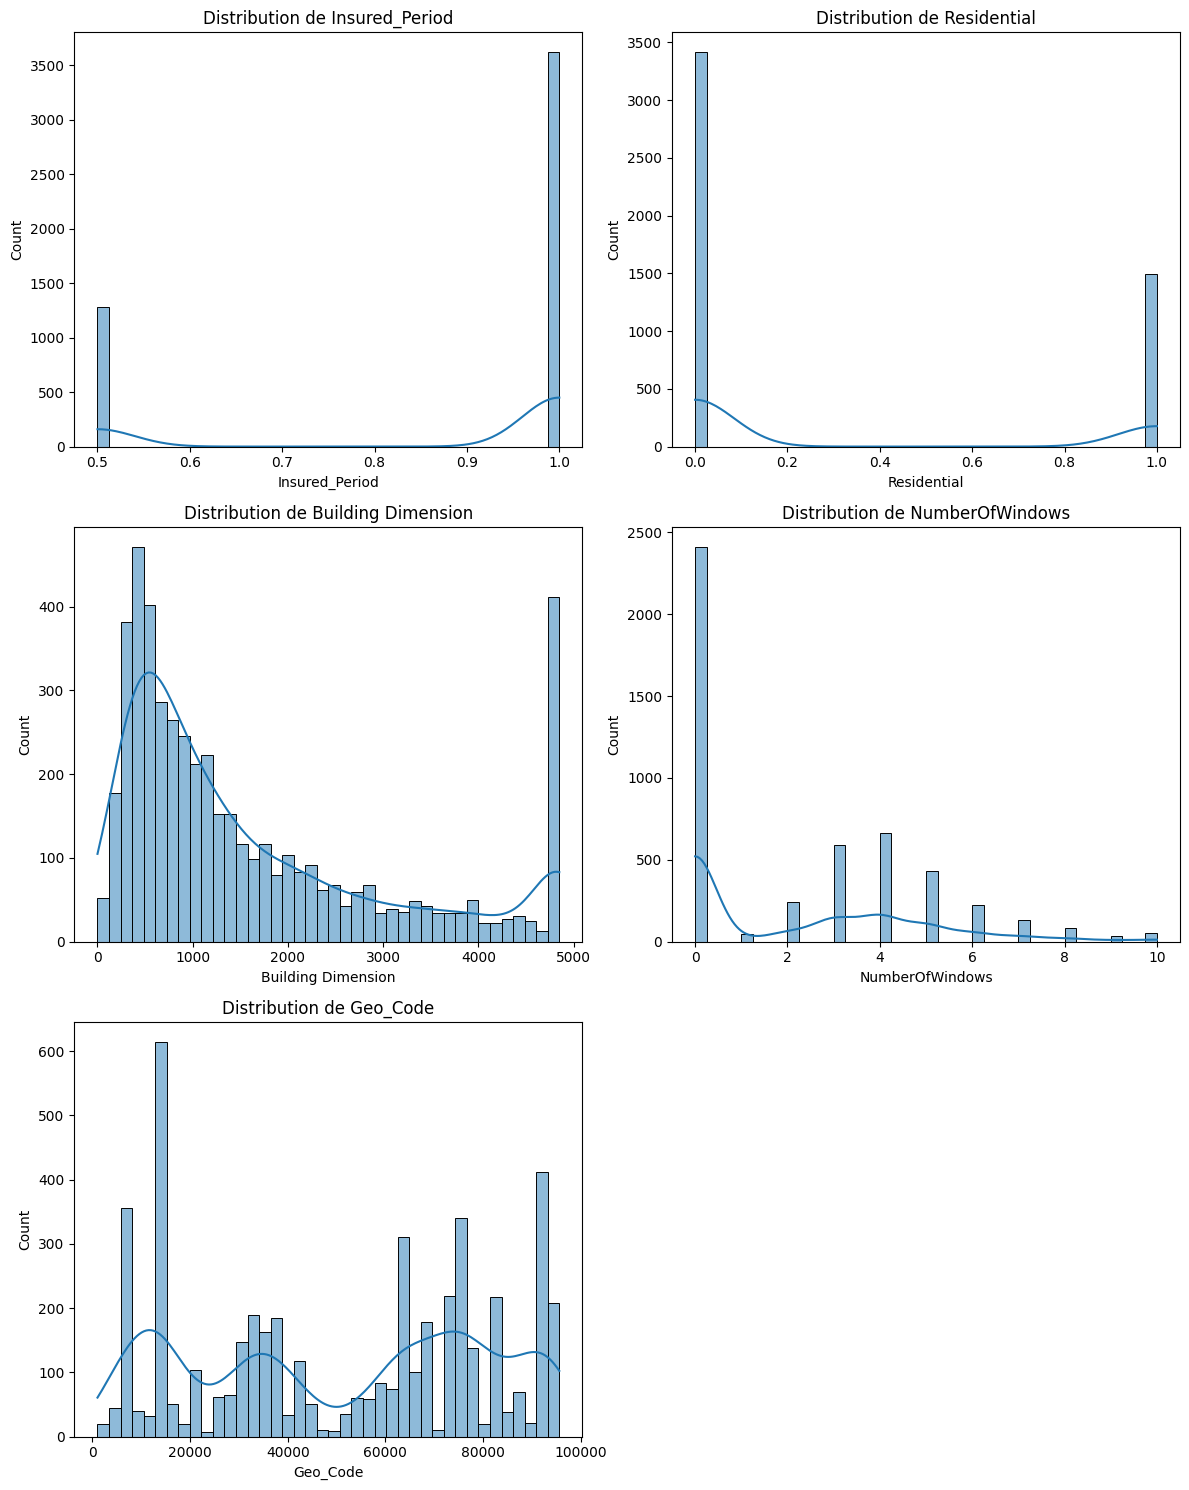

In [35]:
#tronsformation de donner contenu

# Colonnes numériques automatiquement détectées
num_cols = train.select_dtypes(include=["int64", "float64","int"]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["Claim", "Customer Id","YearOfObservation"]]  # exclure cible et id

# Définir la grille (2 colonnes par ligne)
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train[col].dropna(), kde=True, ax=axes[i],bins=40)
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)

# Supprimer les cases vides si besoin
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




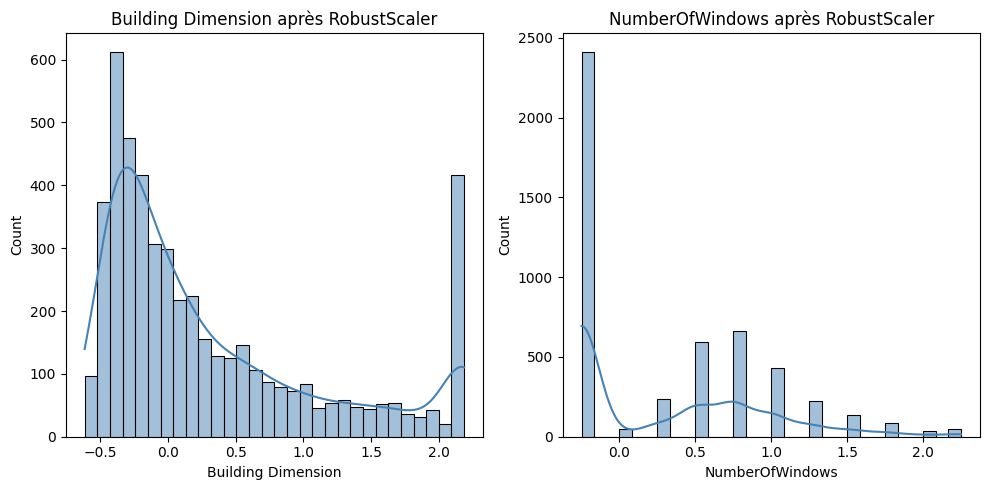

In [36]:
from sklearn.preprocessing import RobustScaler

# --- Colonnes à transformer ---
cols_to_scale = ['Building Dimension', 'NumberOfWindows']

# --- Initialisation du scaler robuste ---
scaler = RobustScaler()

# --- Transformation ---

train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])


n_cols = 2
n_rows = math.ceil(len(cols_to_scale) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_scale):
    sns.histplot(train[col], kde=True, ax=axes[i], color='steelblue', bins=30)
    axes[i].set_title(f"{col} après RobustScaler")

plt.tight_layout()
plt.show()



In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4906 entries, 0 to 4973
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   4906 non-null   int64  
 1   Insured_Period      4906 non-null   float64
 2   Residential         4906 non-null   int64  
 3   Building_Painted    4906 non-null   object 
 4   Building_Fenced     4906 non-null   object 
 5   Garden              4906 non-null   object 
 6   Settlement          4906 non-null   object 
 7   Building Dimension  4906 non-null   float64
 8   Building_Type       4906 non-null   object 
 9   NumberOfWindows     4906 non-null   float64
 10  Geo_Code            4906 non-null   int64  
 11  Claim               4906 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 498.3+ KB


In [38]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# --- Copie du DataFrame ---
train_transformed = train.copy()

# --- Étape 1 : encodage binaire manuel 
#Ces variables (Building_Painted, Building_Fenced, Garden) sont binaires (deux valeurs possibles
#Ici, il est inutile d’utiliser OneHotEncoder ou LabelEncoder, car on ne veut qu’un seul indicateur numérique.
train_transformed["Building_Painted"] = train_transformed["Building_Painted"].replace({'N': 1, 'V': 0})
train_transformed["Building_Fenced"] = train_transformed["Building_Fenced"].replace({'N': 1, 'V': 0})
train_transformed["Garden"] = train_transformed["Garden"].replace({'V': 1, 'O': 0})

# --- Étape 2 : One-Hot Encoding ---
#Ces colonnes (Settlement, Building_Type) sont catégorielles non ordonnées.
train_transformed = pd.get_dummies(train_transformed, columns=["Settlement", "Building_Type"], drop_first=True,dtype='int32')

# --- Étape 3 : Label Encoding sur la cible ---
# La variable cible "Claim" est catégorielle binaire ("Yes"/"No"),
# donc on la convertit en 0/1 via LabelEncoder.
le = LabelEncoder()
train_transformed["Claim"] = le.fit_transform(train_transformed["Claim"])
cols = [c for c in train_transformed.columns if c != "Claim"] + ["Claim"]
train_transformed = train_transformed[cols]


# --- Vérification ---
train_transformed.info()
train=train_transformed

<class 'pandas.core.frame.DataFrame'>
Index: 4906 entries, 0 to 4973
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YearOfObservation              4906 non-null   int64  
 1   Insured_Period                 4906 non-null   float64
 2   Residential                    4906 non-null   int64  
 3   Building_Painted               4906 non-null   int64  
 4   Building_Fenced                4906 non-null   int64  
 5   Garden                         4906 non-null   int64  
 6   Building Dimension             4906 non-null   float64
 7   NumberOfWindows                4906 non-null   float64
 8   Geo_Code                       4906 non-null   int64  
 9   Settlement_U                   4906 non-null   int32  
 10  Building_Type_Non-combustible  4906 non-null   int32  
 11  Building_Type_Ordinary         4906 non-null   int32  
 12  Building_Type_Wood-framed      4906 non-null   int32 

C:\Users\3amme\AppData\Local\Temp\ipykernel_14836\1411225765.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_transformed["Building_Painted"] = train_transformed["Building_Painted"].replace({'N': 1, 'V': 0})
C:\Users\3amme\AppData\Local\Temp\ipykernel_14836\1411225765.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_transformed["Building_Fenced"] = train_transformed["Building_Fenced"].replace({'N': 1, 'V': 0})
C:\Users\3amme\AppData\Local\Temp\ipykernel_14836\1411225765.py:12: FutureWarning: Downcasting behavio

## correlation

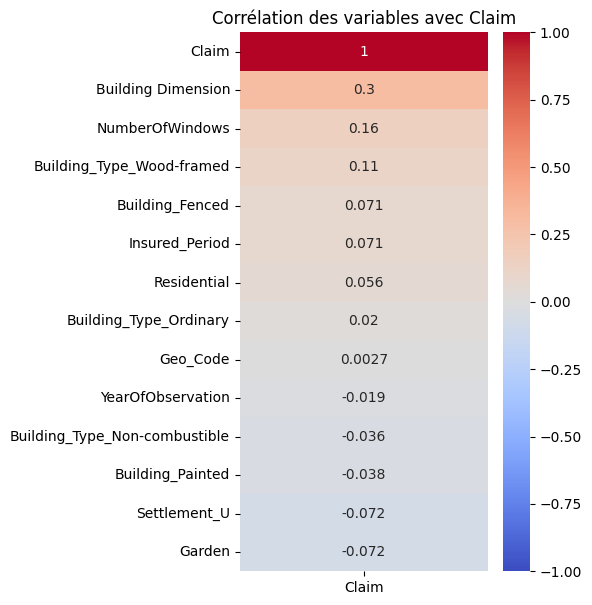

In [39]:
df_corr = train.corr(numeric_only=True)

# Extraire la corrélation avec la cible 'Claim'
corr_with_claim = df_corr[["Claim"]].sort_values(by="Claim", ascending=False)

# Affichage heatmap
plt.figure(figsize=(4, len(corr_with_claim)*0.5))  # taille dynamique selon nombre variables
sns.heatmap(corr_with_claim, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Corrélation des variables avec Claim')
plt.show()

In [40]:
colonnes_supprimer = [
    'Building_Painted',
    'Geo_Code',
    'YearOfObservation',
    'Building_Type_Non-combustible'
]
train = train.drop(columns=colonnes_supprimer)
train = train.reset_index(drop=True)

<h1>le rest de features sont binaire donc on ne faire pas le scaler </h1>

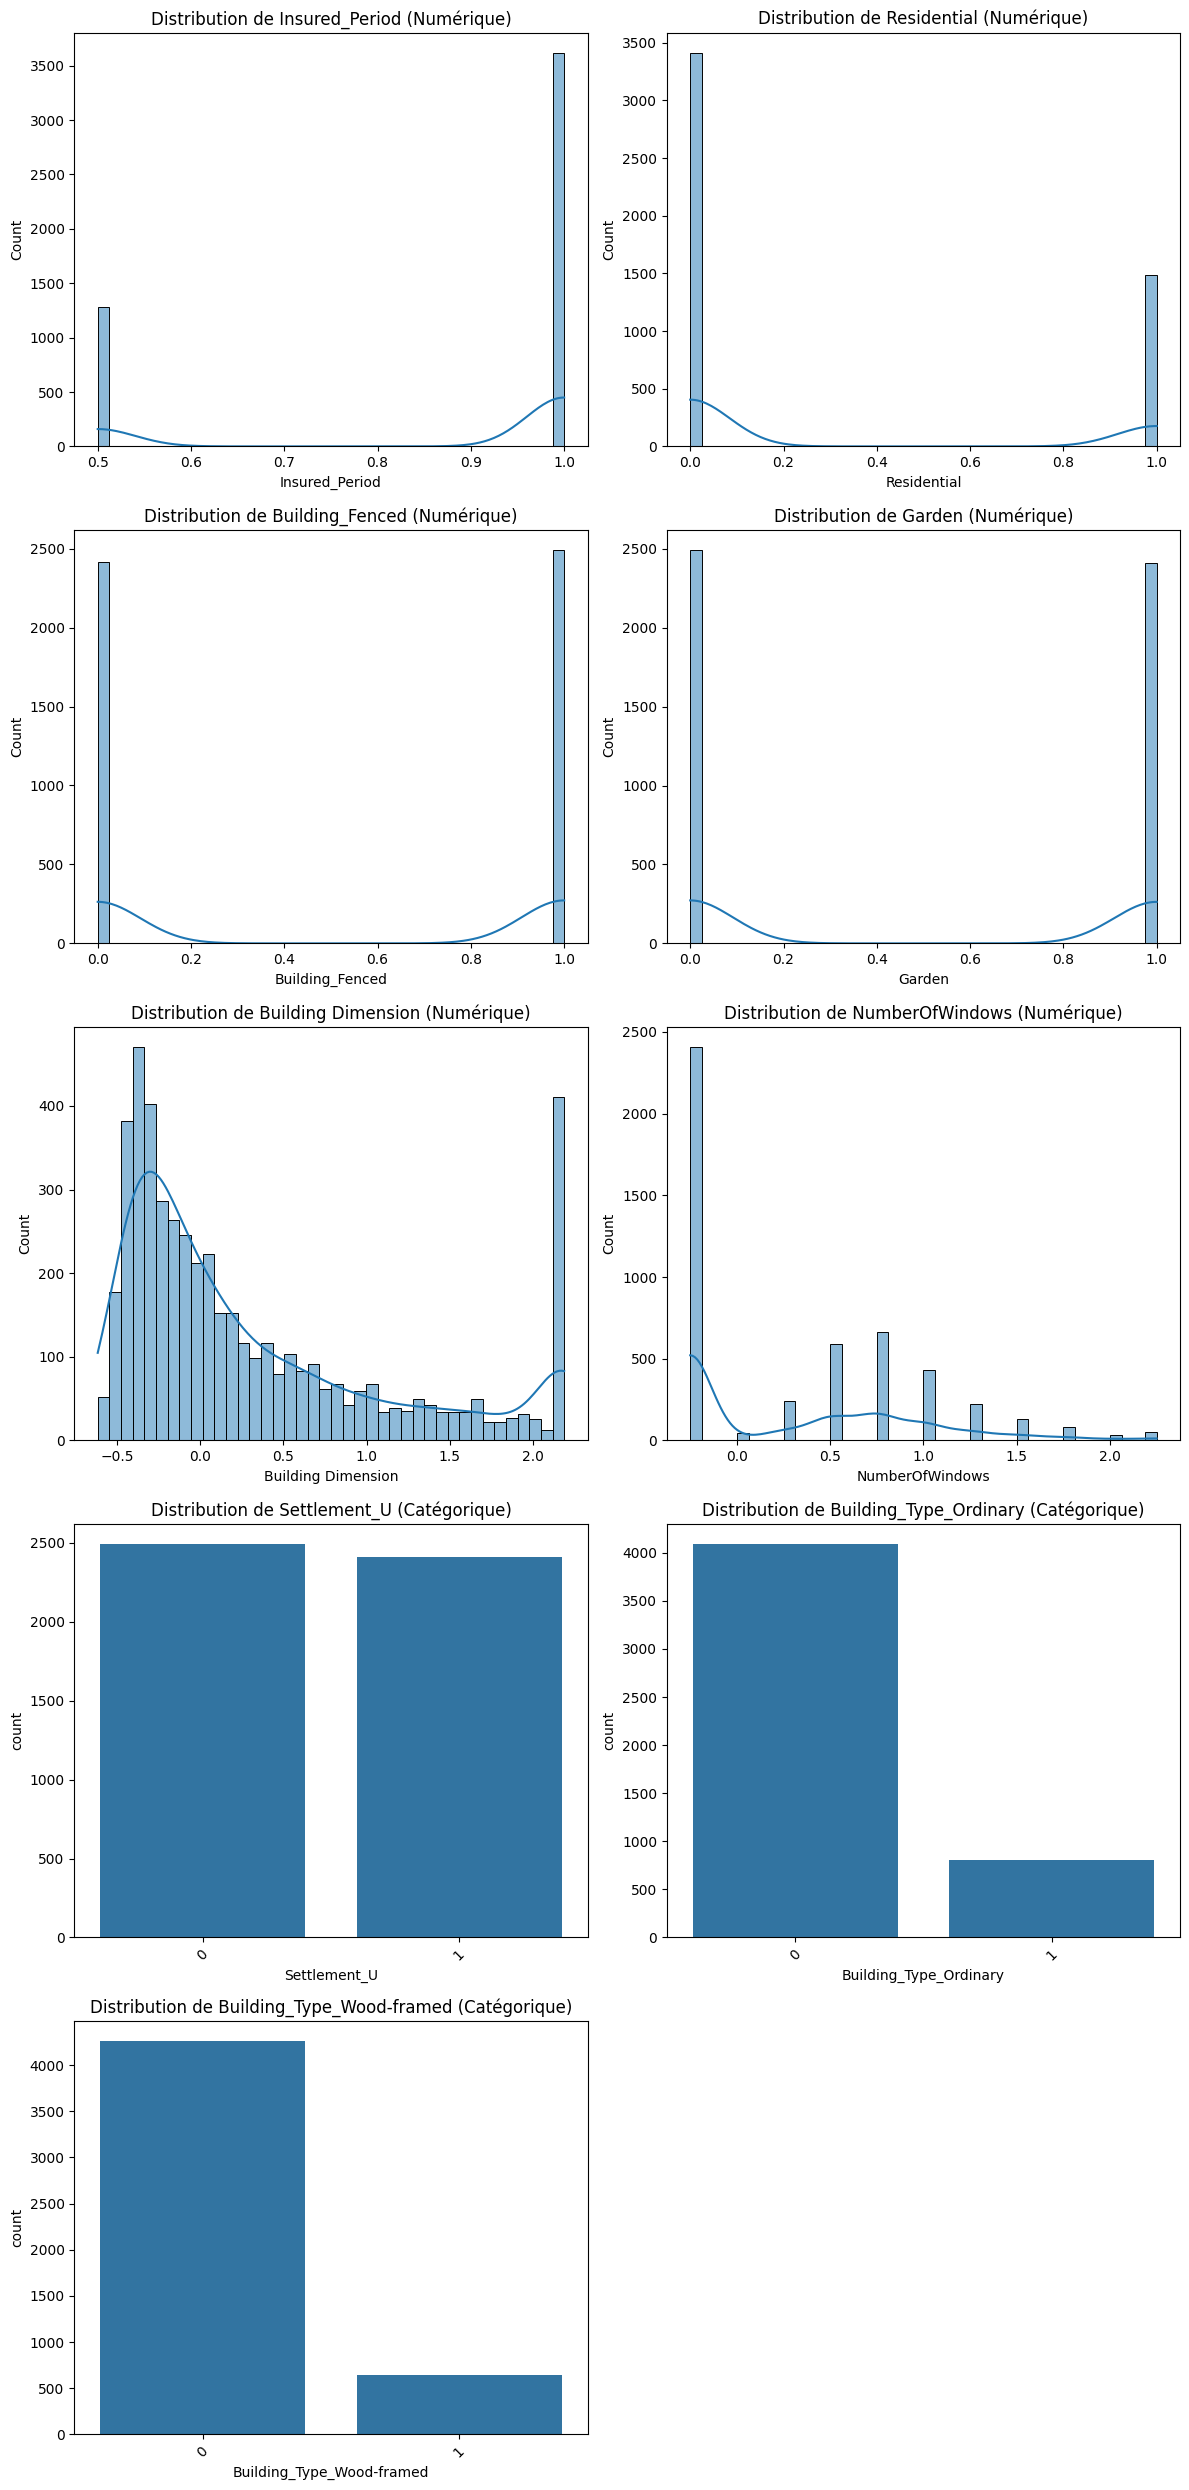

In [41]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Liste de toutes les colonnes sauf cible et ID
cols = [c for c in train.columns if c not in ['Claim']]

# Définir le nombre de colonnes par ligne dans la grille
n_cols = 2
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    if train[col].dtype in ['int64', 'float64', 'int', 'float']:
        # Colonnes numériques : histogramme + KDE
        sns.histplot(train[col].dropna(), kde=True, ax=ax, bins=40)
        ax.set_title(f"Distribution de {col} (Numérique)")
    else:
        # Colonnes catégoriques : barplot des fréquences
        sns.countplot(x=col, data=train, ax=ax)
        ax.set_title(f"Distribution de {col} (Catégorique)")
        for label in ax.get_xticklabels():
            label.set_rotation(45)  # rotation des labels pour lisibilité

    ax.set_xlabel(col)

# Supprimer les axes inutilisés (s'il y en a)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## decalage de donner 


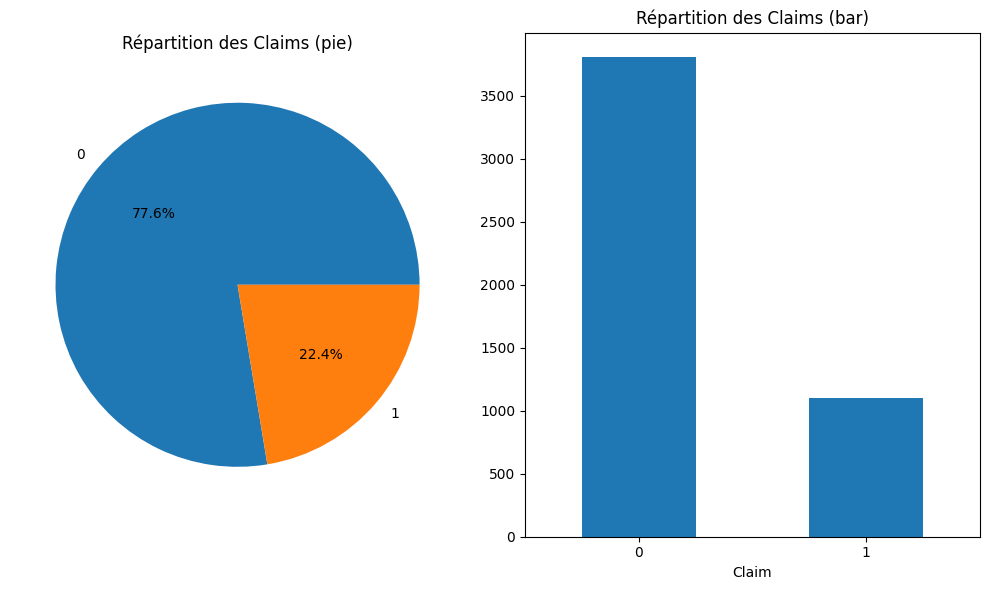

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
train['Claim'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    ylabel='',             
    title='Répartition des Claims (pie)'
)


train['Claim'].value_counts().plot.bar(
    ax=axes[1],
    rot=0,
    title='Répartition des Claims (bar)'
)

plt.tight_layout()
plt.show()

## Pipeline de modélisation complet


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 1. Séparation des features et target
X = train.drop('Claim', axis=1)
y = train['Claim']

# 2. Division train/test (stratifiée)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Distribution target - Train: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Distribution target - Test: {y_test.value_counts(normalize=True).to_dict()}")

ModuleNotFoundError: No module named 'imblearn'

## Définition des modèles avec gestion du déséquilibre

In [ ]:
# Calcul du ratio de déséquilibre pour XGBoost
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Définition des modèles
models = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42)
}

# Models that support class_weight
models_class_weight = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42)
}

## Évaluation avec SMOTE

In [ ]:
# Pipeline avec SMOTE
smote_results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    # Entraînement
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Métriques
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    smote_results[name] = {
        'f1_score': f1,
        'roc_auc': roc_auc,
        'model': pipeline
    }
    
    print(f"=== {name} avec SMOTE ===")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

NameError: name 'Pipeline' is not defined

## Évaluation avec class_weight (sans SMOTE)

In [ ]:


weighted_results = {}

for name, model in models_class_weight.items():
    pipeline = Pipeline([
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    weighted_results[name] = {
        'f1_score': f1,
        'roc_auc': roc_auc,
        'model': pipeline
    }

    print(f"=== {name} avec class_weight ===")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)


=== LogisticRegression avec class_weight ===
F1-Score: 0.4716
ROC-AUC: 0.7173
[[551 211]
 [ 87 133]]
--------------------------------------------------
=== RandomForest avec class_weight ===
F1-Score: 0.3660
ROC-AUC: 0.6412
[[598 164]
 [134  86]]
--------------------------------------------------
=== SVM avec class_weight ===
F1-Score: 0.4530
ROC-AUC: 0.7124
[[579 183]
 [102 118]]
--------------------------------------------------


## Comparaison des performances

In [ ]:
# Comparaison finale
comparison = pd.DataFrame({
    'Model': list(models.keys()),
    'F1_SMOTE': [smote_results.get(name, {}).get('f1_score', 0) for name in models.keys()],
    'ROC_AUC_SMOTE': [smote_results.get(name, {}).get('roc_auc', 0) for name in models.keys()],
    'F1_Weighted': [weighted_results.get(name, {}).get('f1_score', 0) for name in models.keys()],
    'ROC_AUC_Weighted': [weighted_results.get(name, {}).get('roc_auc', 0) for name in models.keys()]
})

print("=== COMPARAISON DES PERFORMANCES ===")
print(comparison.round(4))

# Meilleur modèle basé sur F1-score
best_smote = comparison.loc[comparison['F1_SMOTE'].idxmax()]
best_weighted = comparison.loc[comparison['F1_Weighted'].idxmax()]

print(f"\n Meilleur modèle avec SMOTE: {best_smote['Model']} (F1: {best_smote['F1_SMOTE']:.4f})")
print(f" Meilleur modèle avec class_weight: {best_weighted['Model']} (F1: {best_weighted['F1_Weighted']:.4f})")

=== COMPARAISON DES PERFORMANCES ===
                Model  F1_SMOTE  ROC_AUC_SMOTE  F1_Weighted  ROC_AUC_Weighted
0  LogisticRegression    0.4735         0.7167       0.4716            0.7173
1        RandomForest    0.3577         0.6237       0.3660            0.6412
2    GradientBoosting    0.4588         0.7130       0.0000            0.0000
3                 SVM    0.4722         0.7199       0.4530            0.7124

🎯 Meilleur modèle avec SMOTE: LogisticRegression (F1: 0.4735)
🎯 Meilleur modèle avec class_weight: LogisticRegression (F1: 0.4716)


##  Optimisation du meilleur modèle

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Pipeline complet
pipeline = Pipeline([
    ('model', LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'))
])

# Grille d'hyperparamètres
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.01, 0.1, 1, 10, 100]
}

# GridSearch avec validation croisée stratifiée
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Entraînement
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1:", grid_search.best_score_)

# Évaluation finale
best_final_model = grid_search.best_estimator_
y_pred_final = best_final_model.predict(X_test)

print("\n=== RAPPORT FINAL DE CLASSIFICATION ===")
print(classification_report(y_test, y_pred_final))
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_final))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Meilleur score F1: 0.41296521668226516

=== RAPPORT FINAL DE CLASSIFICATION ===
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       762
           1       0.41      0.47      0.44       220

    accuracy                           0.73       982
   macro avg       0.62      0.64      0.63       982
weighted avg       0.74      0.73      0.74       982

Matrice de confusion:
[[613 149]
 [117 103]]
